In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dicts = dicts + [dicts[0]]

NameError: name 'dicts' is not defined

In [51]:
# Change filename to the name of the file in model/results you want to plot

filenames = [#'result_reproduce_fit0_its100000_time20_20_10_36.csv',\
             'result_reproduce_fit0_its100000_addprob1_pref3_merged.csv',\
             'merged_dataframes_pref2.csv']
             
conditions = [#'reproduction',
    'no_pref_att','callee_pref_att']             

Koens stuff:

In [25]:
def get_pos_neg_lines(data):
    """
    Get absolute positive, negative and total changes in lines in this data
    """
    
    neg_changes = data[data['size_change'] < 0]['size_change'].abs().sum()
    pos_changes = data[data['size_change'] > 0]['size_change'].abs().sum()
    file_change = pos_changes - neg_changes         

    return file_change, pos_changes, neg_changes


def lines_per_commit(data_sim, commits):
    """
    data_sim is the data for one simulation, commits is a list of indices at the commits
    Returns the netto changes, the positive changes, negative changes and the max(insert, delete) changes as lists
    """
    file_changes, change_poss, change_negs, change_maxs = [], [], [], []
    prev_ind = 0
    
    # Iterate over the commits
    for commit in commits:
        # Create separate dataframe for this commit
        data_commit = data_sim.iloc[prev_ind:commit]
        # Get the changes in lines for this commit
        file_change, change_pos, change_neg = get_pos_neg_lines(data_commit)
        change_max = max(change_pos, change_neg)
        
        # Save these changes to separate lists
        file_changes.append(file_change)
        change_poss.append(change_pos)
        change_negs.append(change_neg)
        change_maxs.append(change_max) 
        
        # Change previous index to new commit index
        prev_ind = commit
    
    # Return the list of changes per commit
    return file_changes, change_poss, change_negs, change_maxs        

        
    
def get_lines_for_data(data, f0):
    """
    TODO: do stuff with the results from the lines_per_commit"""
    
    # Add column with size changes
    data['shift'] = data['code_size'].shift(periods=1, fill_value=0)
    data['size_change'] = data['code_size']-data['shift']
    
    commit_sizes_runs = []
    for sim in data['sim'].unique():
        # Data for one sim
        data_sim = data[data['sim']== sim]
        # Commits
        data_commits = data_sim[data_sim['fmin'] >= f0]
        commits = list(data_commits['step'])
        
        # Lists of changes per commit
        file_changes, change_poss, change_negs, change_maxs = lines_per_commit(data_sim, commits)
        commit_sizes_runs.append([file_changes, change_poss, change_negs, change_maxs]) 
        
    # TODO, write to file or smth
    return commit_sizes_runs

In [52]:
for file_number in range(len(filenames)):
    data_ = pd.read_csv(filenames[file_number])
    commit_sizes = get_lines_for_data(data_[1:1000000], .5)
    for commit_number in range(len(commit_sizes)):
        df = pd.DataFrame(commit_sizes[commit_number][3], columns=["colummn"])
        df.to_csv('simulation_results/commit_list' + str(commit_number) + conditions[file_number] + '.csv', index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
simulation0_commits4 = get_lines_for_data(data_no_rec[1:100000], .4)
simulation0_commits5 = get_lines_for_data(data_no_rec[1:100000], .5)
simulation0_commits6 = get_lines_for_data(data_no_rec[1:100000], .6)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'ddata_no_rec' is not defined

In [34]:
file1 = data_no_rec[1:100000]
file2 = data_no_rec[1:100000]
file3 = data_no_rec[1:100000]
file1.to_csv('list1.csv', index=False)
file2.to_csv('list2.csv', index=False)
file3.to_csv('list3.csv', index=False)

In [33]:
print(len(simulation0_commits4[0][0]))
print(len(simulation0_commits5[0][0]))
print(len(simulation0_commits6[0][0]))

17670
768
58


In [21]:
df = pd.DataFrame(time21_11_16_04_commits[0][3], columns=["colummn"])
df.to_csv('list.csv', index=False)

In [26]:
name = 'commit_list' + str(1) + '.csv'
print(name)

commit_list1.csv


In [25]:
str(1)

'1'

Get statistics

In [9]:
def find_commits(data, f0, at_final=False):
    """ 
    Returns a list with the timesteps where the fmin >= f0 and at the final timestep
    """
#     commits = [data['step'].iloc[i] for i in range(len(data)) if data['fmin'].iloc[i] >= f0]
    commits = list(data[data['fmin'] >= f0]['step'])

    if at_final and commits[-1] != data['step'].iloc[-1]:
        commits += [data['step'].iloc[-1]]
    
    return commits


def get_pos_neg_lines(data):
    """
    Get absolute positive, negative and total changes in lines in this data
    """
    
    neg_changes = data[data['size_change'] < 0]['size_change'].abs().sum()
    pos_changes = data[data['size_change'] > 0]['size_change'].abs().sum()
    file_change = pos_changes - neg_changes         

    return file_change, pos_changes, neg_changes


def get_pos_neg_changes(data):
    """
    Get absolute positive, negative and total changes in this data
    """
    pos_changes = data[(data['action']!='remove_method') & (data['changes'] >= 0)]['changes'].abs().sum()    
    neg_changes = data[(data['action']=='remove_method') | (data['changes'] < 0)]['changes'].abs().sum()
    file_change = pos_changes - neg_changes         

    return file_change, pos_changes, neg_changes


def get_changes(data, commits):
    """
    Returns list with mean size of steps/lines/changes per commit
    """
    stats_names = ['steps', 'lines_sum', 'lines_pos', 'lines_neg', 'lines_big', 'changes_sum', 'changes_pos', 'changes_neg', 'changes_big']
    stats = {name : [] for name in stats_names}
    
    # Add column with size changes
    data['shift'] = data['code_size'].shift(periods=1, fill_value=0)
    data['size_change'] = data['code_size']-data['shift']
    
    # Iterate over commits
    prev_ind = 0
    for commit in commits:
        data_commit = data.iloc[prev_ind:commit]
        
        stats['steps'].append(commit-prev_ind)
        
        # Get number of changes lines, added and deleted lines
        file_change, change_pos, change_neg = get_pos_neg_lines(data_commit)
        stats['lines_sum'].append(file_change)
        stats['lines_pos'].append(change_pos)
        stats['lines_neg'].append(change_neg)
        stats['lines_big'].append(max(change_pos, change_neg))
        
        # Get the total, positive and negative changes
        file_change, change_pos, change_neg = get_pos_neg_changes(data_commit)
        stats['changes_sum'].append(file_change)
        stats['changes_pos'].append(change_pos)
        stats['changes_neg'].append(change_neg)
        stats['changes_big'].append(max(change_pos, change_neg))
        
        prev_ind = commit
        
    return {name: np.array(stats[name]).mean() for name in stats_names}, stats_names
#     return [np.array(stats[name]).mean() for name in stats_names], stats_names


def get_action_proportions(data, commits):
    """
    Returns a list with the proportion of actions in the commits
    update, call, remove, create"""
    # Initialize dict
    action_names = ['update_method', 'call_method',
                    'remove_method', 'create_method']
    actions = {name : 0 for name in action_names}

    # Count the actions
    for commit in commits:
        actions[data['action'].iloc[commit]] += 1
    
    # Return the list of action proportions
    return [actions[name]/len(commits) for name in action_names]
    
    
    

In [8]:
def get_statistics(data, f0):
    """
    Returns a dict with lists of statistical values per simulation
    
    """
    statistics = {
        'f0': f0,
        'fmax_means': [],
        'fmin_means': [],
        'f_commit_means': [],
        'f_commit_mins': [],
        'f_commit_maxs': [],
        'num_commits': [],
        
        'steps':[], 
        'lines_sum':[],
        'lines_pos':[],
        'lines_neg':[],
        'lines_big':[],
        'changes_sum':[],
        'changes_pos':[],
        'changes_neg':[],
        'changes_big':[],
        
        'action_props': []
    }
    
    for sim in data['sim'].unique():
        data_sim = data[data['sim']== sim]
        data_commits = data_sim[data_sim['fmin'] >= f0]
        commits = list(data_commits['step'])
        
        # mean fmin and fmax
        statistics['fmin_means'].append(data_sim['fmin'].mean())
        statistics['fmax_means'].append(data_sim['fmax'].mean())
        
        # mean, min, max f for a commit
        statistics['f_commit_means'].append(data_commits['fmean'].mean())
        statistics['f_commit_mins'].append(data_commits['fmin'].mean())
        statistics['f_commit_maxs'].append(data_commits['fmax'].mean())
        statistics['num_commits'].append(len(commits))               
        
        # Mean size of steps/lines/changes per commit
        changes_dict, changes_names = get_changes(data_sim, commits)
        for name in changes_names:
            statistics[name].append(changes_dict[name])
        
        # Proportions last action
        statistics['action_props'].append(get_action_proportions(data_sim, commits))
        if sim %1==0:
            print('running sim {} of {}'.format(sim, len(data['sim'].unique())))
        
        
    return statistics


def dicts_per_exp(datas):
    dicts = []
    for data in datas:
        dicts.append(get_statistics(data, .5))
        print('a dict is done')
    return dicts

In [11]:
dicts = dicts_per_exp(datas)

running sim 0 of 62
running sim 1 of 62
running sim 2 of 62
running sim 3 of 62
running sim 4 of 62
running sim 5 of 62
running sim 6 of 62
running sim 7 of 62
running sim 8 of 62
running sim 9 of 62
running sim 10 of 62
running sim 11 of 62
running sim 12 of 62
running sim 13 of 62
running sim 14 of 62
running sim 15 of 62
running sim 16 of 62
running sim 17 of 62
running sim 18 of 62
running sim 19 of 62
running sim 20 of 62
running sim 21 of 62
running sim 22 of 62
running sim 23 of 62
running sim 24 of 62
running sim 25 of 62
running sim 26 of 62
running sim 27 of 62
running sim 28 of 62
running sim 29 of 62
running sim 30 of 62
running sim 31 of 62
running sim 32 of 62
running sim 33 of 62
running sim 34 of 62
running sim 35 of 62
running sim 36 of 62
running sim 37 of 62
running sim 38 of 62
running sim 39 of 62
running sim 40 of 62
running sim 41 of 62
running sim 42 of 62
running sim 43 of 62
running sim 44 of 62
running sim 45 of 62
running sim 46 of 62
running sim 47 of 62
ru

Fmin over all steps

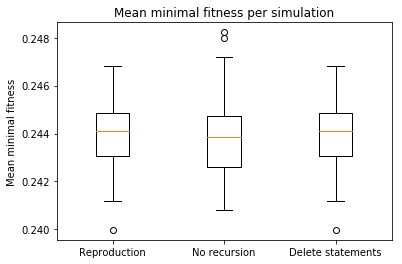

In [13]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['fmin_means']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean minimal fitness per simulation')
plt.ylabel('Mean minimal fitness')
plt.savefig('fmin_means.png')

Max fmin > f0

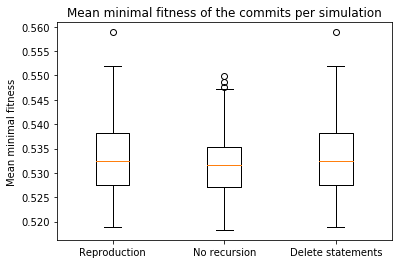

In [14]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['f_commit_mins']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean minimal fitness of the commits per simulation')
plt.ylabel('Mean minimal fitness')
plt.savefig('f_commit_mins.png')

Mean size of steps/lines/changes per commit

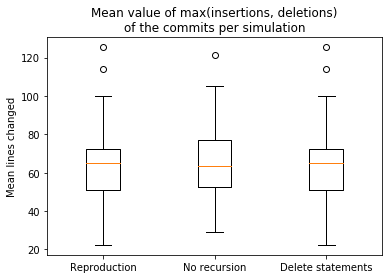

In [15]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['lines_big']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean value of max(insertions, deletions)\nof the commits per simulation')
plt.ylabel('Mean lines changed')
plt.savefig('lines_big.png')

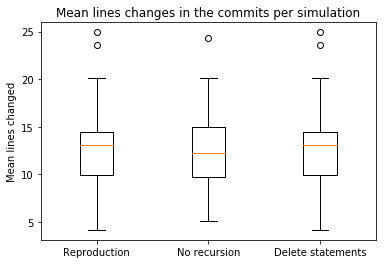

In [16]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['lines_sum']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean lines changes in the commits per simulation')
plt.ylabel('Mean lines changed')
plt.savefig('lines_sum.png')

Changes

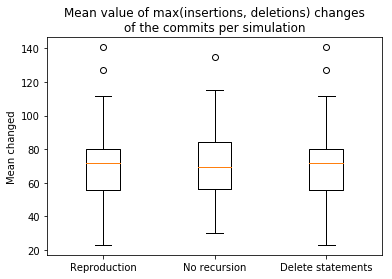

In [17]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['changes_big']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean value of max(insertions, deletions) changes\nof the commits per simulation')
plt.ylabel('Mean changed')
plt.savefig('changes_big.png')

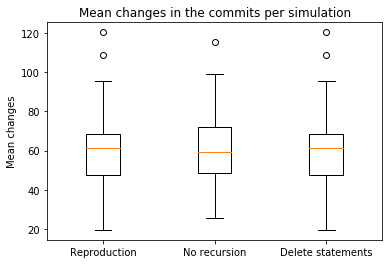

In [18]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['changes_sum']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Mean changes in the commits per simulation')
plt.ylabel('Mean changes')
plt.savefig('changes_sum.png')

Number of commits

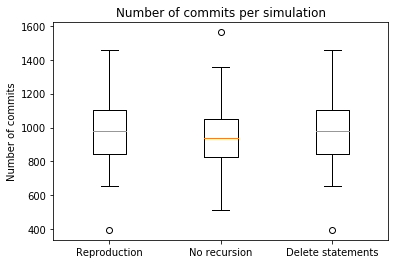

In [19]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['num_commits']))
    
# Plot data
plt.boxplot(plot_data)
plt.xticks(range(1, len(dicts)+1),['Reproduction', 'No recursion', 'Delete statements'])
plt.title('Number of commits per simulation')
plt.ylabel('Number of commits')
plt.savefig('num_commits.png')

Proportions of last actions per commit

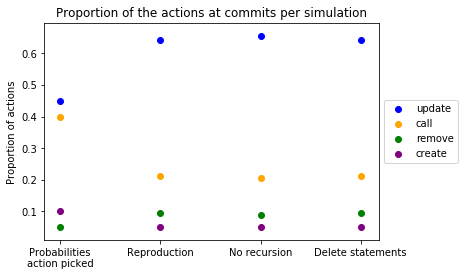

In [21]:
colors = ['blue', 'orange', 'green', 'purple']

# Pplot the real probabilities
plt.scatter(1, .45, c=colors[0], label='update')
plt.scatter(1, .4, c=colors[1], label='call')
plt.scatter(1, .05, c=colors[2], label='remove')
plt.scatter(1, .1, c=colors[3], label='create')
    
plot_data = []
for i in range(len(dicts)):
    update, call, remove, create = zip(*dicts[i]['action_props'])
    plt.scatter(i+2, np.array(update).mean(), c=colors[0])
    plt.scatter(i+2, np.array(call).mean(), c=colors[1])
    plt.scatter(i+2, np.array(remove).mean(), c=colors[2])
    plt.scatter(i+2, np.array(create).mean(), c=colors[3])

plt.xticks(range(1, len(dicts)+2),['Probabilities\naction picked', 'Reproduction', 'No recursion', 'Delete statements'])
plt.title('Proportion of the actions at commits per simulation')
plt.ylabel('Proportion of actions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('action_props.png')

Correlations between fmin and ... action, code size, changes, step

In [ ]:
#TODO